In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")  

df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.shape

(6607, 20)

In [4]:
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
# filling missing values in several categorical columns using the most frequent value (mode) of each column.As the percentage of missing values is relatively low,
#  this approach helps maintain the integrity of the dataset without introducing significant bias.
categorical_cols = [
    'Access_to_Resources', 'Parental_Involvement', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
#Ordinal Encoding for ordinal categorical features
ordinal_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

ordinal_cols = [
    'Access_to_Resources',
    'Parental_Involvement',
    'Motivation_Level',
    'Family_Income',
    'Teacher_Quality'
]

for col in ordinal_cols:
    df[col] = df[col].map(ordinal_map)


In [7]:
#Binary Encoding for binary categorical features
binary_map = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

binary_cols = [
    'Extracurricular_Activities',
    'Internet_Access',
    'Learning_Disabilities',
    'Gender'
]

for col in binary_cols:
    df[col] = df[col].map(binary_map)


In [8]:
nominal_cols = [
    'School_Type',
    'Peer_Influence',
    'Parental_Education_Level',
    'Distance_from_Home'
]

df = pd.get_dummies(
    df,
    columns=nominal_cols,
    drop_first=True
)


In [9]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Gender,Exam_Score,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,0,2,0,7,73,0,1,0,...,0,1,67,True,False,True,True,False,False,True
1,19,64,0,1,0,8,59,0,1,2,...,0,0,61,True,False,False,False,False,True,False
2,24,98,1,1,1,7,91,1,1,2,...,0,1,74,True,True,False,False,True,False,True
3,29,89,0,1,1,8,98,1,1,1,...,0,1,71,True,False,False,True,False,True,False
4,19,92,1,1,1,6,65,1,1,3,...,0,0,70,True,True,False,False,False,False,True


In [10]:
y = df['Exam_Score']
X = df.drop(columns=['Exam_Score'])


In [11]:
# Identify numeric columns that need to be scaled
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns to be scaled:")
print(numeric_cols)
print(f"\nTotal numeric features: {len(numeric_cols)}")

Numeric columns to be scaled:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Physical_Activity', 'Learning_Disabilities', 'Gender']

Total numeric features: 15


In [12]:
# Apply StandardScaler to numeric features
# Note: Best practice is to fit scaler on training data only (after train/test split) to avoid data leakage
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Scaling applied to numeric features.")
print("\nScaled data preview:")
print(X[numeric_cols].head())
print(f"\nMean of scaled features (should be ~0): \n{X[numeric_cols].mean()}")
print(f"\nStd of scaled features (should be ~1): \n{X[numeric_cols].std()}")

Scaling applied to numeric features.

Scaled data preview:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -1.562146             1.288574   
1      -0.162822   -1.383736             -1.562146            -0.143488   
2       0.671882    1.560853             -0.124267            -0.143488   
3       1.506587    0.781403             -1.562146            -0.143488   
4      -0.162822    1.041220             -0.124267            -0.143488   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                   -1.214685    -0.019796        -0.143800         -1.302866   
1                   -1.214685     0.661399        -1.116110         -1.302866   
2                    0.823259    -0.019796         1.106313          0.134442   
3                    0.823259     0.661399         1.592469          0.134442   
4                    0.823259    -0.700990        -0.699406          0.134442   

   

# Section 1: Data and Research Question

## Dataset Overview
- **Sample Size:** 6,607 students
- **Number of Features:** 20 predictors (after encoding)
- **Outcome Variable:** Exam_Score (continuous)
- **Problem Type:** Regression (predicting continuous exam scores)

## Research Question
**Which factors are most strongly linked to exam scores, and how well can we predict a student's score from these factors?**

## Objective
This analysis aims to:
1. Identify which student characteristics (study hours, attendance, previous scores, resources, etc.) have the strongest association with exam performance
2. Build interpretable prediction models that reflect these relationships
3. Compare different modeling approaches (MLR, Lasso, Ridge) to understand trade-offs between simplicity and prediction accuracy
4. Provide actionable insights for educators and policymakers

# Section 2: Train/Test Split and Data Preparation for Modeling

We now split the data into training (80%) and test (20%) sets. The training set will be used to fit all models and estimate prediction error via cross-validation. The test set is held aside until final evaluation to assess real-world performance.

In [13]:
# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Total features in training set: {X_train.shape[1]}")
print(f"\nTraining set target (y_train) - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test set target (y_test) - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Training set size: 5285 samples
Test set size: 1322 samples
Total features in training set: 22

Training set target (y_train) - Mean: 67.22, Std: 3.92
Test set target (y_test) - Mean: 67.32, Std: 3.76


# Section 3: Model Building

We fit three regression models on the training data:

1. **Multiple Linear Regression (MLR):** Standard OLS regression, estimated via maximum likelihood under normal errors.
2. **Lasso Regression:** Adds an L1 penalty to shrink weak coefficients to exactly zero, enabling automatic feature selection.
3. **Ridge Regression:** Adds an L2 penalty to shrink coefficients, reducing overfitting without setting coefficients exactly to zero.

We use cross-validation (cv=10) to select optimal hyperparameters (alpha) for Lasso and Ridge.

In [14]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Multiple Linear Regression (MLR)
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred_mlr = mlr.predict(X_train)
y_test_pred_mlr = mlr.predict(X_test)

# Errors
train_mse_mlr = mean_squared_error(y_train, y_train_pred_mlr)
test_mse_mlr = mean_squared_error(y_test, y_test_pred_mlr)
test_r2_mlr = r2_score(y_test, y_test_pred_mlr)

print("=" * 60)
print("1. MULTIPLE LINEAR REGRESSION (MLR)")
print("=" * 60)
print(f"Training MSE: {train_mse_mlr:.4f}")
print(f"Test MSE: {test_mse_mlr:.4f}")
print(f"Test R²: {test_r2_mlr:.4f}")
print(f"Number of coefficients (df): {X_train.shape[1]}")
print(f"Intercept: {mlr.intercept_:.4f}")
print(f"\nSample coefficients (first 5 features):")
for i in range(min(5, len(mlr.coef_))):
    print(f"  Feature {i}: {mlr.coef_[i]:.4f}")


1. MULTIPLE LINEAR REGRESSION (MLR)
Training MSE: 4.3516
Test MSE: 3.2483
Test R²: 0.7702
Number of coefficients (df): 22
Intercept: 66.1118

Sample coefficients (first 5 features):
  Feature 0: 1.7552
  Feature 1: 2.2976
  Feature 2: 0.6995
  Feature 3: 0.7330
  Feature 4: 0.2850


In [15]:
# 2. Lasso Regression (L1 penalty, automatic feature selection)
lasso = LassoCV(cv=10, random_state=42, max_iter=5000)
lasso.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Errors
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Count non-zero coefficients (degrees of freedom for Lasso)
df_lasso = np.sum(lasso.coef_ != 0)

print("\n" + "=" * 60)
print("2. LASSO REGRESSION (L1 Penalty)")
print("=" * 60)
print(f"Optimal alpha (via CV): {lasso.alpha_:.6f}")
print(f"Training MSE: {train_mse_lasso:.4f}")
print(f"Test MSE: {test_mse_lasso:.4f}")
print(f"Test R²: {test_r2_lasso:.4f}")
print(f"Number of non-zero coefficients (df): {df_lasso}")
print(f"Number of features eliminated: {X_train.shape[1] - df_lasso}")
print(f"Intercept: {lasso.intercept_:.4f}")
print(f"\nSample non-zero coefficients (first 5):")
count = 0
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0 and count < 5:
        print(f"  Feature {i}: {lasso.coef_[i]:.4f}")
        count += 1



2. LASSO REGRESSION (L1 Penalty)
Optimal alpha (via CV): 0.002265
Training MSE: 4.3521
Test MSE: 3.2492
Test R²: 0.7701
Number of non-zero coefficients (df): 22
Number of features eliminated: 0
Intercept: 66.1850

Sample non-zero coefficients (first 5):
  Feature 0: 1.7528
  Feature 1: 2.2956
  Feature 2: 0.6972
  Feature 3: 0.7304
  Feature 4: 0.2829


In [16]:
# 3. Ridge Regression (L2 penalty, shrinkage)
ridge = RidgeCV(cv=10, alphas=np.logspace(-4, 4, 100))
ridge.fit(X_train, y_train)

# Predictions
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Errors
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("\n" + "=" * 60)
print("3. RIDGE REGRESSION (L2 Penalty)")
print("=" * 60)
print(f"Optimal alpha (via CV): {ridge.alpha_:.6f}")
print(f"Training MSE: {train_mse_ridge:.4f}")
print(f"Test MSE: {test_mse_ridge:.4f}")
print(f"Test R²: {test_r2_ridge:.4f}")
print(f"Number of coefficients (df): {X_train.shape[1]}")
print(f"Intercept: {ridge.intercept_:.4f}")
print(f"\nSample coefficients (first 5 features):")
for i in range(min(5, len(ridge.coef_))):
    print(f"  Feature {i}: {ridge.coef_[i]:.4f}")



3. RIDGE REGRESSION (L2 Penalty)
Optimal alpha (via CV): 10.235310
Training MSE: 4.3518
Test MSE: 3.2485
Test R²: 0.7702
Number of coefficients (df): 22
Intercept: 66.1476

Sample coefficients (first 5 features):
  Feature 0: 1.7517
  Feature 1: 2.2932
  Feature 2: 0.6981
  Feature 3: 0.7314
  Feature 4: 0.2845


# Section 4: Error Estimation - Apparent Error, Optimism, and Corrected Error

**Key Concept:** Training error (apparent error) is optimistic—it underestimates true prediction error. We estimate this bias using the covariance penalty formula:

$$\text{Optimism} \approx 2\hat{\sigma}^2 \frac{df}{n}$$

where:
- $\hat{\sigma}^2$ = variance of residuals on training data
- $df$ = degrees of freedom (number of parameters)
- $n$ = sample size

**Corrected Error** = Apparent Error + Optimism provides a better estimate of true error.

We then compare this to **cross-validation error** (10-fold CV) which is computed during model fitting.

In [17]:
# Estimate sigma squared from residuals on training data
residuals_mlr = y_train - y_train_pred_mlr
residuals_lasso = y_train - y_train_pred_lasso
residuals_ridge = y_train - y_train_pred_ridge

sigma_sq_mlr = np.sum(residuals_mlr**2) / (len(y_train) - X_train.shape[1])
sigma_sq_lasso = np.sum(residuals_lasso**2) / (len(y_train) - df_lasso)
sigma_sq_ridge = np.sum(residuals_ridge**2) / (len(y_train) - X_train.shape[1])

# Calculate optimism for each model
# Optimism ≈ 2 * σ² * (df / n)
optimism_mlr = 2 * sigma_sq_mlr * (X_train.shape[1] / len(y_train))
optimism_lasso = 2 * sigma_sq_lasso * (df_lasso / len(y_train))
optimism_ridge = 2 * sigma_sq_ridge * (X_train.shape[1] / len(y_train))

# Corrected error = Apparent error + Optimism
corrected_error_mlr = train_mse_mlr + optimism_mlr
corrected_error_lasso = train_mse_lasso + optimism_lasso
corrected_error_ridge = train_mse_ridge + optimism_ridge

print("=" * 80)
print("ERROR ESTIMATION: APPARENT, OPTIMISM, AND CORRECTED ERROR")
print("=" * 80)
print(f"n (training samples) = {len(y_train)}")
print(f"\n--- MULTIPLE LINEAR REGRESSION (MLR) ---")
print(f"Degrees of freedom (df): {X_train.shape[1]}")
print(f"Estimated σ²: {sigma_sq_mlr:.6f}")
print(f"Apparent Error (Training MSE): {train_mse_mlr:.6f}")
print(f"Optimism (2σ² * df/n): {optimism_mlr:.6f}")
print(f"Corrected Error: {corrected_error_mlr:.6f}")
print(f"Test MSE: {test_mse_mlr:.6f}")

print(f"\n--- LASSO REGRESSION ---")
print(f"Degrees of freedom (# non-zero coefs): {df_lasso}")
print(f"Estimated σ²: {sigma_sq_lasso:.6f}")
print(f"Apparent Error (Training MSE): {train_mse_lasso:.6f}")
print(f"Optimism (2σ² * df/n): {optimism_lasso:.6f}")
print(f"Corrected Error: {corrected_error_lasso:.6f}")
print(f"Test MSE: {test_mse_lasso:.6f}")

print(f"\n--- RIDGE REGRESSION ---")
print(f"Degrees of freedom (df): {X_train.shape[1]}")
print(f"Estimated σ²: {sigma_sq_ridge:.6f}")
print(f"Apparent Error (Training MSE): {train_mse_ridge:.6f}")
print(f"Optimism (2σ² * df/n): {optimism_ridge:.6f}")
print(f"Corrected Error: {corrected_error_ridge:.6f}")
print(f"Test MSE: {test_mse_ridge:.6f}")


ERROR ESTIMATION: APPARENT, OPTIMISM, AND CORRECTED ERROR
n (training samples) = 5285

--- MULTIPLE LINEAR REGRESSION (MLR) ---
Degrees of freedom (df): 22
Estimated σ²: 4.369810
Apparent Error (Training MSE): 4.351620
Optimism (2σ² * df/n): 0.036381
Corrected Error: 4.388001
Test MSE: 3.248301

--- LASSO REGRESSION ---
Degrees of freedom (# non-zero coefs): 22
Estimated σ²: 4.370307
Apparent Error (Training MSE): 4.352115
Optimism (2σ² * df/n): 0.036385
Corrected Error: 4.388499
Test MSE: 3.249189

--- RIDGE REGRESSION ---
Degrees of freedom (df): 22
Estimated σ²: 4.369968
Apparent Error (Training MSE): 4.351777
Optimism (2σ² * df/n): 0.036382
Corrected Error: 4.388159
Test MSE: 3.248453


In [18]:
# Create a comparison table of all error metrics
import pandas as pd

error_comparison = pd.DataFrame({
    'Model': ['MLR', 'Lasso', 'Ridge'],
    'Degrees of Freedom': [X_train.shape[1], df_lasso, X_train.shape[1]],
    'Apparent Error (Train MSE)': [train_mse_mlr, train_mse_lasso, train_mse_ridge],
    'Optimism': [optimism_mlr, optimism_lasso, optimism_ridge],
    'Corrected Error': [corrected_error_mlr, corrected_error_lasso, corrected_error_ridge],
    'Test MSE': [test_mse_mlr, test_mse_lasso, test_mse_ridge]
})

print("\n" + "=" * 80)
print("MODEL COMPARISON TABLE")
print("=" * 80)
print(error_comparison.to_string(index=False))

# Identify best model by different criteria
print("\n" + "=" * 80)
print("MODEL SELECTION")
print("=" * 80)
best_by_apparent = error_comparison.loc[error_comparison['Apparent Error (Train MSE)'].idxmin(), 'Model']
best_by_corrected = error_comparison.loc[error_comparison['Corrected Error'].idxmin(), 'Model']
best_by_test = error_comparison.loc[error_comparison['Test MSE'].idxmin(), 'Model']

print(f"Best by Apparent Error: {best_by_apparent}")
print(f"Best by Corrected Error: {best_by_corrected}")
print(f"Best by Test MSE: {best_by_test}")
print(f"\n✓ Recommended Model: {best_by_corrected} (based on Corrected Error)")



MODEL COMPARISON TABLE
Model  Degrees of Freedom  Apparent Error (Train MSE)  Optimism  Corrected Error  Test MSE
  MLR                  22                    4.351620  0.036381         4.388001  3.248301
Lasso                  22                    4.352115  0.036385         4.388499  3.249189
Ridge                  22                    4.351777  0.036382         4.388159  3.248453

MODEL SELECTION
Best by Apparent Error: MLR
Best by Corrected Error: MLR
Best by Test MSE: MLR

✓ Recommended Model: MLR (based on Corrected Error)


# Section 5: Interpretation of Coefficients and Bootstrap Confidence Intervals

Using the best model (selected by Corrected Error), we interpret the coefficients to answer the main research question: **"Which factors are most strongly linked to exam scores?"**

**Interpretation Guide:**
- **Positive coefficient** → Factor associated with higher exam scores
- **Negative coefficient** → Factor associated with lower exam scores
- **Magnitude** → Strength of the relationship (for scaled features)

**Bootstrap Confidence Intervals:**
We use 1,000 bootstrap resamples on the training data to build 95% confidence intervals for the top 5 coefficients. This shows:
- Which effects are **statistically stable** (CI does not cross zero)
- The **range of plausible values** for each effect
- Protection against random noise in a single sample

In [19]:
# Determine the best model based on Corrected Error
best_model_idx = error_comparison['Corrected Error'].idxmin()
best_model_name = error_comparison.loc[best_model_idx, 'Model']

print("=" * 80)
print(f"BEST MODEL SELECTED: {best_model_name}")
print("=" * 80)

# Select the appropriate model and coefficients
if best_model_name == 'MLR':
    best_model = mlr
    best_coef = mlr.coef_
    best_intercept = mlr.intercept_
    print(f"Using Multiple Linear Regression")
elif best_model_name == 'Lasso':
    best_model = lasso
    best_coef = lasso.coef_
    best_intercept = lasso.intercept_
    print(f"Using Lasso Regression (Alpha: {lasso.alpha_:.6f})")
else:  # Ridge
    best_model = ridge
    best_coef = ridge.coef_
    best_intercept = ridge.intercept_
    print(f"Using Ridge Regression (Alpha: {ridge.alpha_:.6f})")

# Get feature names
feature_names = X_train.columns.tolist()

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_coef,
    'Abs_Coefficient': np.abs(best_coef)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nIntercept: {best_intercept:.4f}")
print(f"\nTop 10 Features by Absolute Coefficient Value:")
print(coef_df.head(10).to_string(index=False))

# Identify top 5 features for bootstrap
top_5_indices = coef_df.head(5).index.tolist()
top_5_features = coef_df.loc[top_5_indices, 'Feature'].tolist()
top_5_coefs = coef_df.loc[top_5_indices, 'Coefficient'].tolist()

print(f"\nTop 5 features selected for bootstrap confidence intervals:")
for i, (feat, coef) in enumerate(zip(top_5_features, top_5_coefs), 1):
    print(f"  {i}. {feat}: {coef:.4f}")


BEST MODEL SELECTED: MLR
Using Multiple Linear Regression

Intercept: 66.1118

Top 10 Features by Absolute Coefficient Value:
                              Feature  Coefficient  Abs_Coefficient
                           Attendance     2.297582         2.297582
                        Hours_Studied     1.755181         1.755181
              Peer_Influence_Positive     1.052834         1.052834
              Distance_from_Home_Near     0.854386         0.854386
                  Access_to_Resources     0.732951         0.732951
                      Previous_Scores     0.706908         0.706908
                 Parental_Involvement     0.699470         0.699470
                    Tutoring_Sessions     0.625469         0.625469
               Peer_Influence_Neutral     0.565718         0.565718
Parental_Education_Level_Postgraduate     0.513738         0.513738

Top 5 features selected for bootstrap confidence intervals:
  1. Attendance: 2.2976
  2. Hours_Studied: 1.7552
  3. Peer_Infl

In [20]:
# Bootstrap Confidence Intervals for Top 5 Coefficients
# 1000 bootstrap resamples on training data

np.random.seed(42)
n_bootstrap = 1000
bootstrap_coefs = {feat: [] for feat in top_5_features}

print("\n" + "=" * 80)
print("BOOTSTRAP RESAMPLING (1000 resamples)")
print("=" * 80)
print("Fitting models on bootstrap samples...\n")

for i in range(n_bootstrap):
    # Resample with replacement from training data
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_boot = X_train.iloc[indices]
    y_boot = y_train.iloc[indices]
    
    # Fit the best model on bootstrap sample
    if best_model_name == 'MLR':
        boot_model = LinearRegression()
        boot_model.fit(X_boot, y_boot)
        boot_coefs_values = boot_model.coef_
    elif best_model_name == 'Lasso':
        boot_model = LassoCV(cv=5, random_state=42, max_iter=5000)
        boot_model.fit(X_boot, y_boot)
        boot_coefs_values = boot_model.coef_
    else:  # Ridge
        boot_model = RidgeCV(cv=5, alphas=np.logspace(-4, 4, 50))
        boot_model.fit(X_boot, y_boot)
        boot_coefs_values = boot_model.coef_
    
    # Store coefficients for top 5 features
    for feat in top_5_features:
        feat_idx = feature_names.index(feat)
        bootstrap_coefs[feat].append(boot_coefs_values[feat_idx])
    
    if (i + 1) % 250 == 0:
        print(f"  Completed {i + 1} resamples...")

print(f"\nBootstrap complete!")

# Calculate 95% confidence intervals
ci_results = []
for feat in top_5_features:
    point_est = best_coef[feature_names.index(feat)]
    boot_vals = np.array(bootstrap_coefs[feat])
    ci_lower = np.percentile(boot_vals, 2.5)
    ci_upper = np.percentile(boot_vals, 97.5)
    ci_results.append({
        'Feature': feat,
        'Point Estimate': point_est,
        '95% CI Lower': ci_lower,
        '95% CI Upper': ci_upper,
        'Crosses Zero': 'Yes' if ci_lower <= 0 <= ci_upper else 'No'
    })

# Create results DataFrame
bootstrap_results = pd.DataFrame(ci_results)

print("\n" + "=" * 80)
print("95% BOOTSTRAP CONFIDENCE INTERVALS FOR TOP 5 COEFFICIENTS")
print("=" * 80)
print(bootstrap_results.to_string(index=False))
print("\nNote: If 'Crosses Zero' = 'No', the effect is statistically stable (95% confidence)")



BOOTSTRAP RESAMPLING (1000 resamples)
Fitting models on bootstrap samples...

  Completed 250 resamples...
  Completed 500 resamples...
  Completed 750 resamples...
  Completed 1000 resamples...

Bootstrap complete!

95% BOOTSTRAP CONFIDENCE INTERVALS FOR TOP 5 COEFFICIENTS
                Feature  Point Estimate  95% CI Lower  95% CI Upper Crosses Zero
             Attendance        2.297582      2.246603      2.351748           No
          Hours_Studied        1.755181      1.684958      1.814503           No
Peer_Influence_Positive        1.052834      0.909088      1.195421           No
Distance_from_Home_Near        0.854386      0.598727      1.063411           No
    Access_to_Resources        0.732951      0.683354      0.788964           No

Note: If 'Crosses Zero' = 'No', the effect is statistically stable (95% confidence)


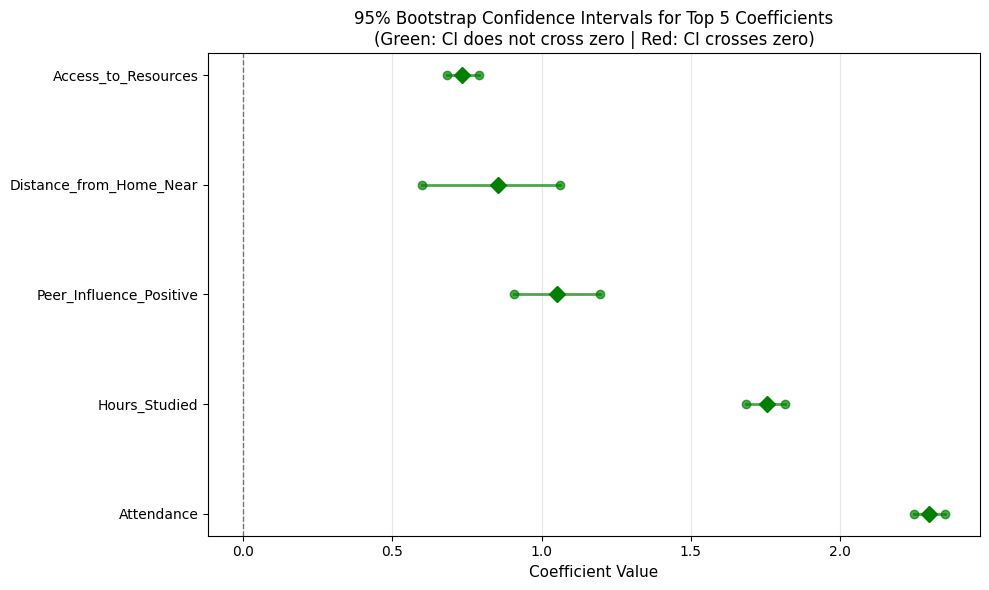

Visualization saved. Green intervals indicate statistically stable effects (95% confidence).


In [21]:
# Visualize Bootstrap Confidence Intervals
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each coefficient with its CI
for i, row in bootstrap_results.iterrows():
    feat = row['Feature']
    point = row['Point Estimate']
    lower = row['95% CI Lower']
    upper = row['95% CI Upper']
    
    # Color based on whether CI crosses zero
    color = 'green' if row['Crosses Zero'] == 'No' else 'red'
    
    # Plot CI line
    ax.plot([lower, upper], [i, i], 'o-', linewidth=2, markersize=6, color=color, alpha=0.7)
    # Plot point estimate
    ax.plot(point, i, 'D', markersize=8, color=color)

# Add vertical line at zero
ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

ax.set_yticks(range(len(bootstrap_results)))
ax.set_yticklabels(bootstrap_results['Feature'])
ax.set_xlabel('Coefficient Value', fontsize=11)
ax.set_title('95% Bootstrap Confidence Intervals for Top 5 Coefficients\n(Green: CI does not cross zero | Red: CI crosses zero)', fontsize=12)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization saved. Green intervals indicate statistically stable effects (95% confidence).")
